# Dick's Climbing Reviews

What are the average ratings for Dicks climbing?

What does the distribution of reviews look like?

## Web Scraping Dick's Climbing

We can see from this analysis that the reviews for Dick's Climbing are generally very strong! There is a huge skew towards 5*.

Therefore, it makes sense to see what we can learn from those reviews that aren't so strong. For this dataset, we can class 3* or less as a 'bad review', while 4* will be classed as 'room for improvement'.


- Collating the reviews into three separate groups:
  - Perfect reviews (5*)
  - Room for improvement (4*)
  - Bad reviews (3*)

To collate into these 3 dataframes, I first iterate through the JSON file from the website, collecting all review data together in a dictionary. 

From here, I calculate the average rating and show the review counts for each possible star rating.

In [4]:
pip install requests

  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 5.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install squarify


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing packages
import requests
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# building function to calculate the average 
def average_rating(rating_list):
    # input: the lsit of ratings showing all ratings found on the website
        avg = round(sum(rating_list) / len(rating_list), 2)
        print("The average rating is: " + str(avg))


# building function to show the bad reviews in order of worst to best. The category for a 'bad' review is if the rating was 3 or less out of 5
def worst_reviews(id_rating_dict):
    # input: the rating list showing all ratings found on the website and the corresponding user_id's
    worst_ratings = {}
    value = rating, comments
    for key, value in id_rating_dict.items():
         if value[0] <= 3:
              worst_ratings[key] = value
    worst_ratings_asc = sorted(worst_ratings.items(), key=lambda u_r: u_r[1])
    return dict(worst_ratings_asc)

# 5 star reviews!
def best_reviews(id_rating_dict):
    best_ratings = {}
    value = [rating, comments]
    for key, value in id_rating_dict.items():
         if value[0] == 5:
              best_ratings[key] = value
    best_ratings_list = sorted(best_ratings.items(), key=lambda u_r: u_r[1])
    return dict(best_ratings_list)

# 4 star reviews. Still room for improvement.
def room_for_improvement(id_rating_dict):
    good_ratings = {}
    value = [rating, comments]
    for key, value in id_rating_dict.items():
         if value[0] == 4:
              good_ratings[key] = value
    good_ratings_list = sorted(good_ratings.items(), key=lambda u_r: u_r[1])
    return dict(good_ratings_list)



# initialize
total_pages = 1
page = 0
rating_list = []
id_rating_dict = {}


# while loop to iterate through each page in the website
while page < total_pages:
    url = f'https://api.reviews.io/merchant/reviews?store=dicks-climbing&min_rating=0&order=desc&per_page=16&page={page}'
    resp = requests.get(url)
    review_data = resp.json()
    if page == 0:
        total_pages = review_data['total_pages']
        # print(total_pages)
    page += 1
    user_review = review_data['reviews']    
    for u in user_review:
        rating = u['rating']
        comments = u['comments']
        rating_list.append(rating)
        id_rating_dict[u['user_id']] = rating, comments





In [127]:
# room_for_improvement(id_rating_dict)
best_reviews_values = best_reviews(id_rating_dict).values()
improvement_reviews_values = room_for_improvement(id_rating_dict).values()
worst_reviews_values = worst_reviews(id_rating_dict).values()

best_df = pd.DataFrame(best_reviews_values, columns = ['star_rating', 'comments'])
improvement_df = pd.DataFrame(improvement_reviews_values, columns = ['star_rating', 'comments'])
worst_df = pd.DataFrame(worst_reviews_values, columns = ['star_rating', 'comments'])
frames = [best_df, improvement_df, worst_df]

all_comments_df = pd.concat(frames, keys=["5_star", "4_star", "3_star_or_less"])
all_comments_df.tail()







# for key, value in best_reviews(id_rating_dict):
#     best_reviews_values.append(value)




star_rating  \
3_star_or_less 9             3   
               10            3   
               11            3   
               12            3   
               13            3   

                                                            comments  
3_star_or_less 9   I ordered a Moon crash pad which arrived swift...  
               10  Item arrived very quickly. Order confirmation,...  
               11  Its not the stores problem but DHL charged ext...  
               12  Me habeis pedido una valoracion de los articul...  
               13  Not on DC, but havent received my package yet....

In [128]:
average_rating(rating_list)



The average rating is: 4.94


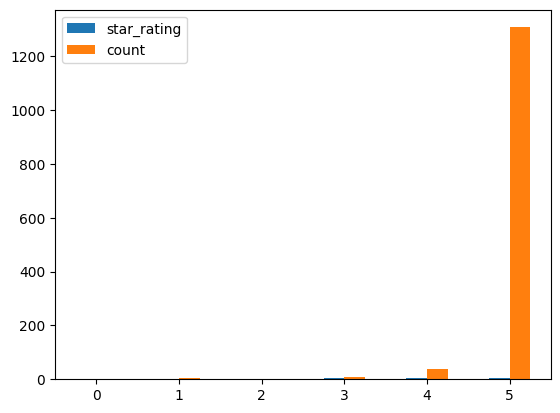

In [137]:
count_dict = {}
star = [0, 1, 2, 3, 4, 5]

for i in star:
        count = rating_list.count(i) 
        count_dict[i] = count

count_dict

ratings_df = pd.DataFrame(count_dict.items(), columns = ['star_rating', 'count'])
ax = ratings_df.plot.bar(rot=0)




In [130]:
ratings_df.head(6)

,Star Rating,Count
0,0,0
1,1,4
2,2,2
3,3,8
4,4,38
5,5,1307


## Data Exploration of negative reviews

Lets dig into the data to better understand the nature of each category of review.
Some initial questions that come to mind:
- How long are the reviews? 
- What is the length of the average word length? Perhaps more positive reviews go into more detail, using a wider range of vocab.
- What are the most common words? Are there any common themes that they can address to improve on the less than perfect reviews?

## Next Stages

- simple matplotlib exploration of reviews
- create a word cloud of the most common words in the bad reviews section
- common themes? EDA

In [131]:
all_comments_df

star_rating  \
5_star         0             5   
               1             5   
               2             5   
               3             5   
               4             5   
...                        ...   
3_star_or_less 9             3   
               10            3   
               11            3   
               12            3   
               13            3   

                                                            comments  
5_star         0               Very efficient.  No problems at all.   
               1                               Super quick delivery!  
               2                                  ...............jjj  
               3   1 item {dragonfly} arrived promptly as indicat...  
               4   1st time customer...good prices and good servi...  
...                                                              ...  
3_star_or_less 9   I ordered a Moon crash pad which arrived swift...  
               10  Item arrived very quickly. Order confirmation,...  
               11  Its not the stores problem but DHL charged ext...  
               12  Me habeis pedido una valoracion de los articul...  
               13  Not on DC, but havent received my package yet....  

[1331 rows x 2 columns]

In [147]:
# !pip install spacy
# pip install wordcloud

zsh:1: command not found: pip


In [164]:
# import spacy
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

from nltk.tokenize import sent_tokenize, word_tokenize


## Filtering out stopwords

Before doing any NLP analytics, I first want to remove all stop words. These are common words (i.e. in, and) that don't add much meaning.

In [166]:
stop = stopwords.words('english')

In [143]:
all_comments_df['comments']

5_star          0                 Very efficient.  No problems at all. 
                1                                 Super quick delivery!
                2                                    ...............jjj
                3     1 item {dragonfly} arrived promptly as indicat...
                4     1st time customer...good prices and good servi...
                                            ...                        
3_star_or_less  9     I ordered a Moon crash pad which arrived swift...
                10    Item arrived very quickly. Order confirmation,...
                11    Its not the stores problem but DHL charged ext...
                12    Me habeis pedido una valoracion de los articul...
                13    Not on DC, but havent received my package yet....
Name: comments, Length: 1331, dtype: object